
The Q-tensor theory serves as a powerful tool for characterizing the uniaxial nematic order parameters in liquid crystals. The second-order tensor 𝐌, which is symmetric and semidefinite positive, can be expressed as:

$$
\mathbf{M} = \int_{\mathbb{S}^2} (\mathbf{m} \otimes \mathbf{m}) f(\mathbf{m}) d\sigma(\mathbf{m}) \quad (2)
$$

The order tensor 𝐐 is defined by the traceless tensor:

$$
\mathbf{Q} = \mathbf{M} - \frac{1}{3} \mathbf{I} \quad (3)
$$

where 𝐈 is the identity matrix.

In the uniaxial case, the order tensor 𝐐 can be written as:

$$
\mathbf{Q}_{uni} = S (\mathbf{n} \otimes \mathbf{n} - \frac{1}{3} \mathbf{I}) \quad (4)
$$

Here, the degree of orientation, S, is defined as:

$$
S = \frac{1}{2} \langle 3\cos^2 \beta - 1 \rangle \quad (5)
$$

By analyzing the eigenvalues and eigenvectors of the order tensor 𝐐, one can effectively describe the properties and behavior of uniaxial nematic liquid crystals using Q-tensor theory.


The study of nematic liquid crystals has long been an area of interest in the field of soft condensed matter physics. These materials exhibit a unique combination of fluid-like properties and long-range orientational order, which makes them ideal candidates for various applications such as display technologies and sensors. One of the key aspects of understanding nematic liquid crystals is the characterization of their orientational order. In the case of uniaxial nematics, the nematic order parameter provides a quantitative measure of the degree of alignment of the constituent molecules with a common axis, known as the director.

To compute the uniaxial nematic order parameter, we start by considering a set of orientations of particles represented by the unit vectors 𝐦. Due to the molecular D∞h symmetry, the probability measure f is even, since opposite orientations are physically equivalent: 𝑓(−𝐦)=𝑓(𝐦). To obtain non-trivial information about the orientational order, we need to calculate the second moments, which are represented by the second-order tensor 𝐌. This tensor is symmetric and semidefinite positive, and can be calculated as the integral over all possible orientations of particles: 𝐌=∫𝕊2(𝐦⊗𝐦)𝑓(𝐦)𝑑𝜎(𝐦).

The order tensor 𝐐, which is a traceless tensor, can then be defined as 𝐐=𝐌−(1/3)𝐈, where 𝐈 is the identity matrix. For uniaxial nematics, the order tensor 𝐐 can be simplified as 𝐐𝑢𝑛𝑖=𝑆(𝐧⊗𝐧−(1/3)𝐈), where S is the scalar parameter called the degree of orientation, and 𝐧 is the director. The degree of orientation S can be computed as 𝑆=(1/2)⟨3cos²𝛽−1⟩, where the angle brackets denote averaging with respect to f. The uniaxial nematic order parameter, also known as the scalar order parameter S, effectively quantifies the extent to which the molecules in the liquid crystal align with the director. A higher value of S indicates a higher degree of alignment, while a value of zero signifies an isotropic phase with no preferred orientation.







# Example on a disordered system
We start by considering a random system of particles with random orientations. Naturally, the nematic order parameter should be zero for such a particle orientation set. Let's see how to calculate this using freud.

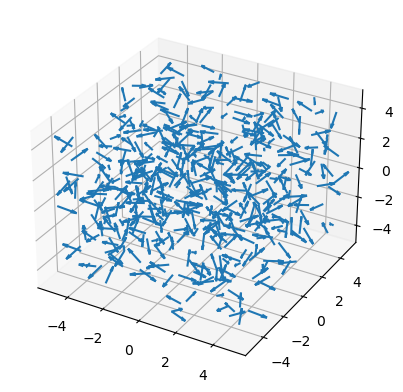

The value of the order parameter is 0.05305209755897522.


In [1]:
from email.base64mime import header_length

import freud
import matplotlib.pyplot as plt
import numpy as np
import rowan

%matplotlib inline

# make a system
L = 10
N = 500
box, points = freud.data.make_random_system(L, N, seed=0)

# make random orientations using rowan
orientations = rowan.rotate(rowan.random.rand(N), [1, 0, 0])

# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
)
plt.show()

nematic = freud.order.Nematic()
# new freud API uses orientations instead of quaternions
nematic.compute(orientations)
print(f"The value of the order parameter is {nematic.order}.")

As we can see the calculated nematic order parameter is very close to zero indicating that there is no order in the orientation of the particles. This makes sense given, that orientations were generated randomly.

# Liquid crystal in a nematic phase

Nematic phase is defined as a phase in which the value of the nematic order parameter in the range between 0.3 and 0.7. The positions are disordered, but the orientations show some order in the preferred direction dictated by the director.

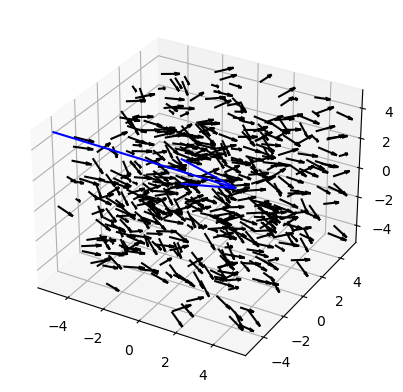

The value of the order parameter is 0.5088440775871277.
Director is [ 0.9997192  -0.02366362  0.00120225].


In [41]:
# We rotate identity quaternions slightly, in a random direction
orientations = np.asarray(
    [
        [1, 0, 0],
    ]
    * N
)


def randomize_orientations(orientations, perturbation_magnitude):
    randomized_orientations = []
    for orientation in orientations:
        phi = np.random.uniform(0, 2 * np.pi)
        costheta = np.random.uniform(-1, 1)
        theta = np.arccos(costheta)

        perturbation = (
            np.array(
                [
                    np.sin(theta) * np.cos(phi),
                    np.sin(theta) * np.sin(phi),
                    np.cos(theta),
                ]
            )
            * perturbation_magnitude
        )

        new_orientation = orientation + perturbation
        # Normalize the new orientation vector to maintain unit length
        new_orientation /= np.linalg.norm(new_orientation)
        randomized_orientations.append(new_orientation)
    return np.array(randomized_orientations)


orientations = randomize_orientations(orientations, 0.75)
# make a 3D plot of the system
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="k",
)
director = nematic.director
ax.quiver3D(
    -L / 2,
    -L / 2,
    L / 2,
    director[0],
    director[1],
    director[2],
    length=L,
    normalize=True,
    color="blue",
)
plt.show()
nematic = freud.order.Nematic()
# new freud API uses orientations instead of quaternions
nematic.compute(orientations)
print(f"The value of the order parameter is {nematic.order}.")
print(f"Director is {nematic.director}.")

In [ ]:
import freud
import scipy.optimize


def calc_smectic(d, director, pos):
    return -(
        np.absolute(np.sum(np.exp(np.dot(director, pos.T) * 2 * np.pi * 1j / d)))
    ) / len(pos)


nop = freud.order.Nematic()  # this should be the default orientation of your particles
nop.compute(orientations)
director = nop.director / np.linalg.norm(nop.director)
optd = scipy.optimize.brute(
    calc_smectic,
    ranges=(slice(job.sp.LD * 0.25, job.sp.LD * 1.8, 0.10),),
    args=(director, points),
    finish=scipy.optimize.fmin,
)[0]
smec = -calc_smectic(optd, director, points)